In [2]:
# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

import numpy as np
from scipy import linalg

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.io import savemat

# font defaults for matplotlib
font = {'size'   : 18}
mpl.rc('font', **font)

In [17]:
runner = ra.runAUTO()
r1 = ac.run(e='DNLS', c='DNLS', runner=runner, UZSTOP = {1 : 2}, NPR=2 )

Starting DNLS ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)          U(4)          U(5)          U(6)     
   1     1  EP    1   0.00000E+00   1.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1     2        2   1.00864E-02   1.01004E+00   8.15269E-39   8.24589E-37   8.33935E-35   8.43386E-33   8.52945E-31   8.62612E-29
   1     4        3   2.03412E-02   1.02014E+00   3.48139E-33   1.78113E-31   9.10899E-30   4.65850E-28   2.38244E-26   1.21842E-24
   1     6        4   3.07579E-02   1.03030E+00   6.28202E-30   2.16805E-28   7.47610E-27   2.57798E-25   8.88967E-24   3.06543E-22
   1     8        5   4.13302E-02   1.04051E+00   1.20890E-27   3.16676E-26   8.28335E-25   2.16669E-23   5.66745E-22   1.48244E-20
   1    10        6   5.20521E-02   1.05077E+00   6.82457E-26   1.44760E-24   3.06374E-23   6.48419E-22   1.37233E-20   2.90444E-19
   1    12        7   6.29178E-02   1.06106E+00   1.7739

Text(0, 0.5, 'power')

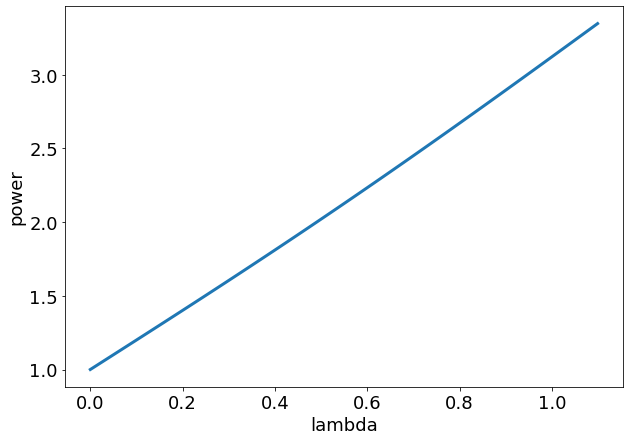

In [99]:
# bifurcation diagram

bd = r1
branches = [ 
         {  "par"        : br.coordarray[0,:], 
            "L2norm"     : br.coordarray[1,:],
            "branchnum"  : br.BR,
            "solpar"     : np.array( [ bd(id).PAR(1) for id in br.getLabels() ] ),
            "u"          : np.array( [ bd(id)[0]['u'] for id in br.getLabels() ] ),
            "PT"         : np.array( [ br[ bd(id)['PT']-1 ]['PT'] for id in br.getLabels() ]  )
         } for br in bd ]

plt.figure(figsize=(10,7))
for index, branch in enumerate(branches):
    bcolor = 'C'+str(index)
    plt.plot( branch['par'], branch['L2norm']**2, c=bcolor, linewidth=3)
    
plt.xlabel('lambda')
plt.ylabel('power')

In [91]:
# plot solution along with place on bifurcation diagram
def plotsol(b, index, **kwargs):
    hscale = kwargs.get("hscale", False)
    xlim = kwargs.get("xlim", 20)
    
    sol = branches[b]['u'][index]
    d = branches[b]['solpar'][index]
    solnorm = np.linalg.norm(sol)    
    
    fig, axs = plt.subplots(1, 2, figsize=(15,7))
    # bif diag plot
    for index, branch in enumerate(branches):
        bcolor = 'C'+str(index)
        axs[0].plot( branch['par'], branch['L2norm']**2, c=bcolor, linewidth=2)
        axs[0].scatter(d, solnorm**2, color='black', s=120)
    # solution plot
    if hscale:
        center = int(len(sol)/2);
        h = 1.0/np.sqrt(d)
        x = h*np.arange(-center+1,center+1)
        axs[1].plot( x, sol, linewidth=2 )
        axs[1].scatter( x, sol, s=100 )
        axs[1].set_xlim(-xlim,xlim)
    else:
        center = int(len(sol)/2);
        offset = 10;
        sol = sol[center-offset-1:center+offset]
        x = np.arange(-offset,offset+1)
        axs[1].plot( x, sol, linewidth=2 )
        axs[1].scatter( x, sol, s=100 )

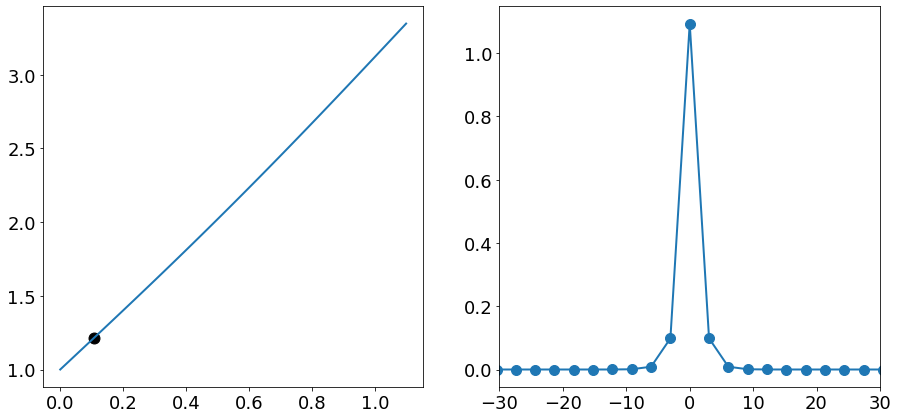

In [100]:
plotsol(0, 10, hscale=True, xlim=30)